# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Akram Fais
- **Email:** makramfais@gmail.com
- **ID Dicoding:** 4eezzzz

## Menentukan Pertanyaan Bisnis

- Bagaimana pola indikator polusi udara (PM2.5) di Kota Wanshouxigong dari tahun 2013 hingga 2017?
- Adakah korelasi antara indikator *air quality* dengan suhu  di Kota Wanshouxigong?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Membaca data dengan method dari library pandas yaitu `read_csv()` dan ditampung ke dalam variabel df**

In [4]:
df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


### Assessing Data

**Melihat kolom yang terdapat pada dataset beserta tipe datanya.**



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Terdapat beberapa tipe data yang tidak sesuai dan perlu diubah
- kolom *year*, *month*, dan *day* perlu diubah menjadi tipe data category

**Menghitung data pada setiap kolom**

In [6]:
df.count()

No         35064
year       35064
month      35064
day        35064
hour       35064
PM2.5      34368
PM10       34580
SO2        34395
NO2        34310
CO         33767
O3         33986
TEMP       35045
PRES       35045
DEWP       35045
RAIN       35045
wd         34985
WSPM       35051
station    35064
dtype: int64

**Pengecekan pada Data yang Hilang**

In [7]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

**Pengecekan Jumlah Data Duplikat**

In [8]:
print("Jumlah data duplikat: ", df.duplicated().sum())

Jumlah data duplikat:  0


### Cleaning Data

**Membuat Kolom baru dengan nama Date**

In [9]:
# Gabungkan kolom year, month, dan day menjadi satu kolom date
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Hapus kolom year, month, dan day yang tidak diperlukan lagi
df.drop(['year', 'month', 'day'], axis=1, inplace=True)

# Pindahkan kolom date ke sebelah kanan kolom No
date_column = df.pop('date')  # Menghapus kolom date dari dataframe dan menyimpannya di date_column
df.insert(df.columns.get_loc('No') + 1, 'date', date_column)  # Menyisipkan kolom date ke sebelah kanan kolom No

# Tampilkan lima baris pertama dari dataframe untuk memastikan perubahan
df.head()

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013-03-01,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013-03-01,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013-03-01,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013-03-01,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


Pembuatan kolom baru ini bertujuan untuk memudahkan dalam pembacaan data. Kolom dengan nama `date` ini merupakan penggabungan antara kolom *year*, *month*, dan *day*.

**Mengatasi Data yang Hilang**

In [10]:
df = df.dropna(subset=['wd'], how='any', axis=0)

Pada kolom `wd`, data yang hilang dihapus

In [11]:
df = df.copy()
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Perulangan untuk setiap fitur
for feature in features:
    df[feature].interpolate(method='linear', limit_direction='forward',inplace=True)

Pada kolom yang bertipe numerik, data tersebut diatasi dengan menggunakan metode interpolasi.

In [12]:
df.isna().sum()

No         0
date       0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Mengatasi Data Outliers**

In [13]:
df = df.copy()
for fitur in features:
    Q1 = df[fitur].quantile(0.25)
    Q3 = df[fitur].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    kondisi_lower_than = df[fitur] < minimum
    kondisi_more_than = df[fitur] > maximum

    df.drop(df[kondisi_lower_than].index, inplace=True)
    df.drop(df[kondisi_more_than].index, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore Dataset

**Pengecekan Parameter Statistik**

In [14]:
df.describe()

,No,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.000000,24618.0,24618.000000
mean,17927.895564,11.243602,58.118776,81.887414,9.877737,47.527632,950.138252,55.524758,15.155092,1011.079150,3.455488,0.0,1.685750
std,10053.203434,6.986806,49.627552,58.972451,9.928785,26.241620,538.440859,47.442491,10.827119,10.689952,14.044973,0.0,0.993499
min,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.300000,985.400000,-34.300000,0.0,0.000000
25%,9879.250000,5.000000,18.000000,31.000000,2.000000,27.000000,500.000000,15.000000,6.000000,1002.400000,-8.600000,0.0,1.000000
50%,18398.500000,11.000000,45.000000,72.000000,6.000000,44.000000,800.000000,47.000000,17.000000,1009.900000,5.600000,0.0,1.500000
75%,26908.750000,18.000000,84.000000,119.000000,14.000000,65.000000,1300.000000,83.000000,24.100000,1019.500000,15.900000,0.0,2.300000
max,35064.000000,23.000000,255.000000,299.000000,44.000000,127.000000,2500.000000,195.444444,39.000000,1042.000000,28.500000,0.0,4.500000


Setelah dilakukan pembersihan data, parameter statistik lebih kelihatan normal daripada sebelum dilakukan pembersihan data. Dimana data yang sebelum dibersihkan memiliki kesenjangan yang tinggi.

**Mencari Korelasi antar Kolom Numerik**

In [15]:
df.corr(numeric_only=True)

,No,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.007027,-0.033853,-0.088182,-0.188467,-0.044727,-0.049782,-0.024493,-0.132965,0.279254,-0.120161,NaN,0.102623
hour,0.007027,1.000000,-0.015999,0.059880,0.047934,-0.075383,-0.044754,0.316972,0.113111,-0.002735,-0.051114,NaN,0.168510
PM2.5,-0.033853,-0.015999,1.000000,0.808890,0.303977,0.506050,0.727098,-0.059629,0.121959,-0.193535,0.350909,NaN,-0.286374
PM10,-0.088182,0.059880,0.808890,1.000000,0.342113,0.548048,0.621107,-0.020284,0.144480,-0.218252,0.285373,NaN,-0.238008
SO2,-0.188467,0.047934,0.303977,0.342113,1.000000,0.314663,0.433084,-0.105360,-0.309133,0.215425,-0.301503,NaN,-0.020971
NO2,-0.044727,-0.075383,0.506050,0.548048,0.314663,1.000000,0.628316,-0.528083,-0.099100,-0.013196,0.159010,NaN,-0.487818
CO,-0.049782,-0.044754,0.727098,0.621107,0.433084,0.628316,1.000000,-0.277941,-0.063241,-0.035431,0.243228,NaN,-0.390450
O3,-0.024493,0.316972,-0.059629,-0.020284,-0.105360,-0.528083,-0.277941,1.000000,0.550660,-0.391348,0.255703,NaN,0.327557
TEMP,-0.132965,0.113111,0.121959,0.144480,-0.309133,-0.099100,-0.063241,0.550660,1.000000,-0.838896,0.827551,NaN,-0.019483
PRES,0.279254,-0.002735,-0.193535,-0.218252,0.215425,-0.013196,-0.035431,-0.391348,-0.838896,1.000000,-0.785084,NaN,0.138591


- Korelasi antar indikator polusi udara (PM2.5 dan PM10) memiliki nilai yang tinggi yang menandakan kedua kolom sangat berhubungan.
- Indikator polusi udara (PM2.5 dan PM10) memiliki korelasi yang tinggi dengan CO (Karbon Monoksida = pembakaran bahan bakar fosil) dan NO2 (Nitrogen Dioksida = pembakaran bahan bakar dan aktivitas industri) dengan nilai lebih dari 0.5.

## RFM Analysis  

**Pembagian Musim**

In [16]:
df['season'] = (df['date'].dt.month%12 + 3)//3
df['season'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

Pembagian musim dalam setahun ini digunakan untuk melihat korelasi antara *air quality index*  (PM2.5, PM10, SO2, NO2, CO, dan 03) dengan musim. Pembagian musim ini terbagi menjadi 4 jenis yaitu Winter (Musimg Dingin), Spring (Musim Semi), Summer (Musim Panas), dan Autumn (Musim Gugur). Pembagian musim ini dibagi berdasarkan jadwal masing-masing musim pada biasanya.

In [17]:
df.head() #Pengecekan kembali

,No,date,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season
0,1,2013-03-01,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong,Spring
1,2,2013-03-01,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong,Spring
3,4,2013-03-01,3,8.0,8.0,3.0,16.0,250.0,47.5,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong,Spring
4,5,2013-03-01,4,8.0,8.0,3.0,12.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong,Spring
5,6,2013-03-01,5,10.0,10.0,4.0,8.0,200.0,64.0,-1.6,1024.7,-21.1,0.0,NE,2.0,Wanshouxigong,Spring


In [18]:
# Kelompokkan PM2.5 menjadi kelompok rendah, sedang, dan tinggi
def group_pm25(pm25):
    if pm25 <= 35:
        return 'Rendah'
    elif pm25 <= 75:
        return 'Sedang'
    else:
        return 'Tinggi'

df['pm25_group'] = df['PM2.5'].apply(group_pm25)

# Tampilkan distribusi kelompok PM2.5
pm25_group_counts = df['pm25_group'].value_counts()
print("Distribusi Kelompok PM2.5:")
print(pm25_group_counts)

Distribusi Kelompok PM2.5:
Rendah    10518
Tinggi     7282
Sedang     6818
Name: pm25_group, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola indikator polusi udara (PM2.5) di Wanshouxigong dari tahun 2013 hingga 2017?

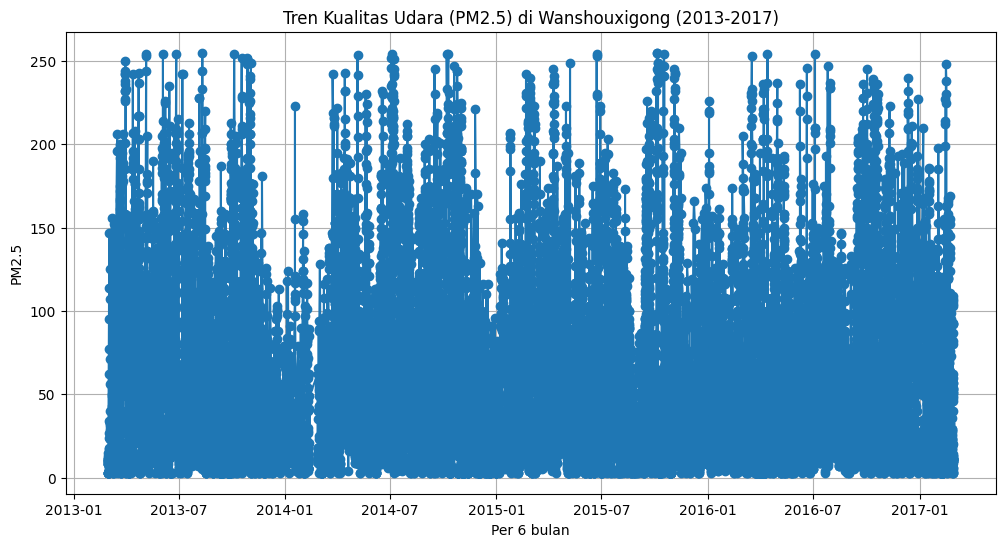

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['PM2.5'], marker='o', linestyle='-')
plt.title('Tren Kualitas Udara (PM2.5) di Wanshouxigong (2013-2017)')
plt.xlabel('Per 6 bulan')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()

Dapat dilihat dari grafik diatas, pola indikator polusi udara (PM2.5) tidak terlalu jelas dikarenakan titik yang teralu banyak dan saling tumpang tindih. Tetapi terdapat penurunan yang signifikan pada akhir tahun 2013 dan awal tahun 2014, yang berarti itu terjadi pada saat musim dingin (Winter).

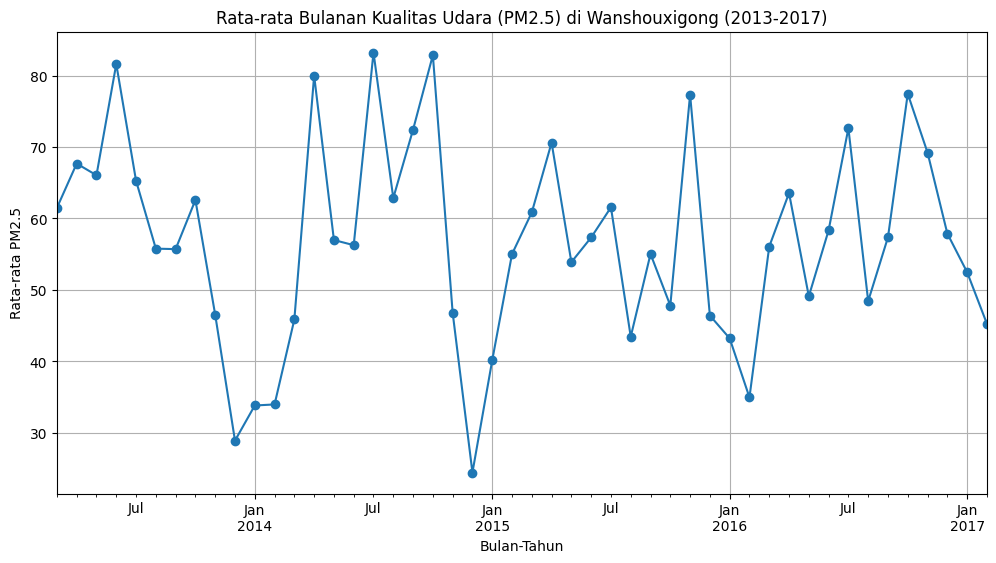

In [20]:
df['month_year'] = df['date'].dt.to_period('M')
monthly_avg_pm25 = df.groupby('month_year')['PM2.5'].mean()

plt.figure(figsize=(12, 6))
monthly_avg_pm25.plot(marker='o')
plt.title('Rata-rata Bulanan Kualitas Udara (PM2.5) di Wanshouxigong (2013-2017)')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True)
plt.show()

Jika melihat dari sudut pandang rata-rata bulanan, indikator polusi udara (PM2.5) di Kota Wanshouxigong memiliki nilai rerata antara 20 sampai dengan 85, yang dimana kualitas udaranya masih bisa dihirup oleh manusia (tetapi beresiko bagi orang yang mempunyai penyakit pernapasan)

### Pertanyaan 2: Adakah korelasi antara indikator *air quality* dengan suhu  di Kota Wanshouxigong?

In [21]:
# Korelasi PM2.5 dengan Suhu
print("Korelasi PM2.5 dengan Suhu =",df['PM2.5'].corr(df['TEMP']))

Korelasi PM2.5 dengan Suhu = 0.12195900722210268


In [22]:
# Korelasi PM10 dengan Suhu
print("Korelasi PM10 dengan Suhu =",df['PM10'].corr(df['TEMP']))

Korelasi PM10 dengan Suhu = 0.14448040633116532


In [23]:
# Korelasi SO2 dengan Suhu
print("Korelasi SO2 dengan Suhu = ",df['SO2'].corr(df['TEMP']))

Korelasi SO2 dengan Suhu =  -0.3091333297044277


In [24]:
# Korelasi NO2 dengan Suhu
print("Korelasi NO2 dengan Suhu = ",df['NO2'].corr(df['TEMP']))

Korelasi NO2 dengan Suhu =  -0.0991003732709496


In [25]:
# Korelasi CO dengan Suhu
print("Korelasi CO dengan Suhu = ",df['CO'].corr(df['TEMP']))

Korelasi CO dengan Suhu =  -0.06324090036388777


In [26]:
# Korelasi O3 dengan Suhu
print("Korelasi cuaca dengan jumlah rental = ",df['O3'].corr(df['TEMP']))

Korelasi cuaca dengan jumlah rental =  0.5506596950792094


- Pada hasil korelasi diatas, korelasi yang ditunjukkan antara O3 (Konsentrasi Ozon dalam udara) dengan suhu memiliki nilai korelasi yang cukup tinggi, yaitu 0.5. Ini berarti menunjukkan bahwa O3 dan Suhu memiliki hubungan yang tinggi.
- Sedangkan indikator polusi udara (PM2.5 dan PM10) memiliki nilai yang rendah yang berarti hubungan antara indikator polusi udara dengan suhu tidak terlalu kuat.
- Dan korelasi yang memiliki nilai terendah ada diantara SO2 (Konsentrasi Sulfur Dioksida dalam udara) dengan suhu, yaitu -0.3

## Conclusion

- Conclution pertanyaan 1  
  Dilihat dari rerata nilai per bulan, pola indikator polusi udara (PM2.5) di Kota Wanshouxigong mengalami kenaikan dan penurunan yang signifikan (Tidak Stabil). Pada akhir tahun sampai dengan awal tahun indikator polusi udara (PM2.5) di Kota Wanshouxigong mengalami penurunan. Pola tersebut dapat dilihat pada grafik, yaitu pada akhir tahun 2013 sampai awal tahun 2014, akhir tahun 2014 sampai awal tahun 2015, dan akhir tahun 2015 sampai awal tahun 2016. Yang dimana pola ini kerap terjadi pada musim dingin (Winter).  

- Conclution pertanyaan 2  
  Secara keseluruhan, indikator *air quality* tidak berhubungan dengan suhu yang ada di Kota Wanshouxigong. Dapat dilihat dari korelasi antar indikator *air quality* dengan suhu, hampir seluruh indikator *air quality* menunjukkan nilai yang rendah sehingga dapat disimpulkan bahwa tidak ada korelasi antara indikator *air quality* dengan suhu di Kota Wanshouxigong.